In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

## Read in and examine the heart attack cost disparities data.

In [78]:
ha_costs_df = pd.read_csv('/Users/nora/Desktop/git/vanderbilt-data-essentials-cohort-2/data/mmd_heart_attack_data.csv')
ha_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [79]:
ha_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


In [80]:
ha_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 17 columns):
year                   2656 non-null int64
geography              2656 non-null object
measure                2656 non-null object
adjustment             2656 non-null object
analysis               2656 non-null object
domain                 2656 non-null object
condition              2656 non-null object
primary_sex            2656 non-null object
primary_age            2656 non-null object
primary_dual           2656 non-null object
fips                   2656 non-null int64
county                 2656 non-null object
state                  2656 non-null object
urban                  2656 non-null object
primary_race           2656 non-null object
primary_denominator    2656 non-null object
analysis_value         2656 non-null int64
dtypes: int64(3), object(14)
memory usage: 352.8+ KB


In [81]:
ha_costs_df.state.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'PUERTO RICO'],
      dtype=object)

#### Next: Create a new dataframe containing only data from tennessee.  

Multiple ways to do this. I used `.query`.

Can also use `.loc`. For example `tennessee = ha_costs_df.loc[ha_costs_df.state == 'TENNESSEE']`.



In [82]:
tennessee = ha_costs_df.query('state == "TENNESSEE"')
tennessee.shape

(91, 17)

In [83]:
tennessee.county.nunique()

91

In [84]:
tennessee.urban.value_counts()

Rural    53
Urban    38
Name: urban, dtype: int64

In [85]:
tennessee.analysis_value.describe()

count       91.000000
mean     45762.989011
std       6574.670462
min      30831.000000
25%      41105.500000
50%      45384.000000
75%      49698.500000
max      62641.000000
Name: analysis_value, dtype: float64

#### Next: Compare costs between urban and rural counties in Tennessee.

In [86]:
print('Costs for urban counties:')
print(tennessee.loc[tennessee.urban == 'Urban'].analysis_value.describe())
print('====================================')
print('Costs for rural counties:')
print(tennessee.loc[tennessee.urban == 'Rural'].analysis_value.describe())

Costs for urban counties:
count       38.000000
mean     45748.921053
std       7109.788921
min      32279.000000
25%      40452.750000
50%      45496.500000
75%      50734.500000
max      61541.000000
Name: analysis_value, dtype: float64
Costs for rural counties:
count       53.000000
mean     45773.075472
std       6232.724885
min      30831.000000
25%      41240.000000
50%      45384.000000
75%      48998.000000
max      62641.000000
Name: analysis_value, dtype: float64


#### Observation: There appears to be no difference in heart attack costs between urban and rural counties in Tennessee. 

## Read in and examine the cancer cost data.

In [87]:
cancer_costs_df = pd.read_csv('/Users/nora/Desktop/git/vanderbilt-data-essentials-cohort-2/data/mmd_cancer_data.csv')
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [88]:
cancer_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


In [89]:
cancer_costs_df.shape

(3165, 17)

In [90]:
tenn_cancer = cancer_costs_df.query('state == "TENNESSEE"')
tenn_cancer.shape

(95, 17)

#### Observation: There are 91 counties in the Tennessee heart attack dataframe, but 95 counties in the Tennessee cancer dataframe. 

#### Next: Determine what counties are unique to the cancer data.

Multiple ways to do this. I created unique lists and took the difference, a good approach because it takes the absolute difference between the data sets. 

Could also use `list(set(tenn_cancer.county)-set(tennessee.county))` but this code requires that you to know which dataset contains more of the variable than the other.

In [91]:
cancer_counties = list(tenn_cancer.county.unique())
ha_counties = list(tennessee.county.unique())

list(set(cancer_counties).difference(ha_counties))

['Hancock County', 'Van Buren County', 'Moore County', 'Pickett County']

In [92]:
tenn_cancer.analysis_value.describe()

count       95.000000
mean     19757.894737
std       2436.304533
min      15454.000000
25%      18103.500000
50%      19563.000000
75%      21153.000000
max      27740.000000
Name: analysis_value, dtype: float64

## Read in and examine the income data from the IRS CSV file.

In [93]:
income_df = pd.read_csv('/Users/nora/Desktop/git/vanderbilt-data-essentials-cohort-2/data/irs_county_2016.csv')
income_df.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152
2,1,AL,0,Alabama,3,529780,259680,80320,181410,297440,...,297770,290358,0,0,0,0,41330,40647,474140,1569463
3,1,AL,0,Alabama,4,495750,211100,141800,127420,272030,...,397940,983800,40,22,0,0,73880,110840,415850,1173195
4,1,AL,0,Alabama,5,263130,82330,137610,35760,154540,...,252940,1346083,20,27,0,0,63240,140446,194790,542205


In [94]:
tenn_income = income_df.query('STATE == "TN"')
tenn_income.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648


In [95]:
tenn_income.tail()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
20515,47,TN,189,Wilson County,4,14400,7130,4050,2610,6520,...,12340,34654,0,0,0,0,2090,4150,12140,31712
20516,47,TN,189,Wilson County,5,9330,2890,5160,960,4600,...,9010,50591,0,0,0,0,2080,5356,7100,19970
20517,47,TN,189,Wilson County,6,7160,1060,5630,380,3560,...,7110,61964,0,0,0,0,1710,5743,5290,17041
20518,47,TN,189,Wilson County,7,10350,780,9260,240,5330,...,10330,190229,60,13,0,0,3810,19921,6270,24591
20519,47,TN,189,Wilson County,8,2370,180,2130,50,1700,...,2370,230759,1160,1817,1080,3775,1260,39698,880,9411


In [96]:
tenn_income.shape

(768, 148)

In [97]:
tenn_income = tenn_income[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]
tenn_income.head(2)

,STATE,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,N2,NUMDEP,ELDERLY,A00100,N02650,A02650,N02300,A02300
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132


In [98]:
tenn_income.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']
tenn_income.head(2)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132


In [99]:
tenn_income.tail(2)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
20518,TN,Wilson County,7,10350,780,9260,240,29640,10040,2600,1384798,10350,1404054,170,600
20519,TN,Wilson County,8,2370,180,2130,50,6720,2220,700,948065,2370,968457,30,118


### Replace coding values in `income_bucket` with descriptive text

In [100]:
income_dict = {0:'Total', 1:'Under $1', 2:'Between 1 and $10,000', 3:'Between 10,000 and $25,000', 4:'Between 25,000 and $50,000', 5:'Between 50,000 and $75,000', 6:'Between 75,000 and $100,000', 7:'Between 100,000 and $200,000', 8:'$200,000 or more'}

In [101]:
tenn_income.income_bucket = tenn_income.income_bucket.replace(income_dict)

In [102]:
tenn_income.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,"Between 10,000 and $25,000",717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,"Between 25,000 and $50,000",759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,"Between 50,000 and $75,000",396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


### Create a new df that aggregates by county to get the totals for each county.

In [103]:
income_county_agg = tenn_income.groupby('county').agg('sum').reset_index()

In [104]:
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


In [105]:
income_county_agg.tail()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
91,Wayne County,5730,2150,2720,810,11830,3690,1430,240866,5700,243850,290,987
92,Weakley County,12850,5440,5360,1800,25130,7820,3320,563374,12810,572176,600,1449
93,White County,11030,4430,4900,1510,22230,6900,2790,438258,10990,444471,360,770
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125
95,Wilson County,64160,26680,29070,6880,128480,40230,15240,4256127,64000,4325080,1010,3424


In [106]:
avg_income_list=[]
for row in income_county_agg.iterrows():
    vals = row[1]
    income = vals["total_inc_amt"] * 1000
    count = vals["returns_with_total_inc"]
    avg_income_list.append(round(income/ count,0))

income_county_agg['avg_income'] = avg_income_list

In [107]:
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53617.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47308.0
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41485.0
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39919.0
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56978.0


In [108]:
income_county_agg = income_county_agg.sort_values('avg_income', ascending = False)
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0
18,Davidson County,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0
46,Knox County,207730,97340,81770,24260,394450,119160,49830,14272173,206990,14528414,3410,11587,70189.0
32,Hamilton County,164170,75180,61490,23840,312800,97450,40590,11249180,163590,11427589,3560,11502,69855.0
23,Fayette County,19030,7510,7910,3190,37250,11450,5510,1289529,18970,1312112,420,1310,69168.0


### Another way to do it...

In [109]:
income_county_agg['avg_income2'] = round(income_county_agg.total_inc_amt * 1000 / income_county_agg.returns_with_total_inc, 0)
income_county_agg.head(3)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income,avg_income2
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0,130072.0
18,Davidson County,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0,71028.0
46,Knox County,207730,97340,81770,24260,394450,119160,49830,14272173,206990,14528414,3410,11587,70189.0,70189.0


Find which datasets have missing values.

In [110]:
tennessee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 2030 to 2120
Data columns (total 17 columns):
year                   91 non-null int64
geography              91 non-null object
measure                91 non-null object
adjustment             91 non-null object
analysis               91 non-null object
domain                 91 non-null object
condition              91 non-null object
primary_sex            91 non-null object
primary_age            91 non-null object
primary_dual           91 non-null object
fips                   91 non-null int64
county                 91 non-null object
state                  91 non-null object
urban                  91 non-null object
primary_race           91 non-null object
primary_denominator    91 non-null object
analysis_value         91 non-null int64
dtypes: int64(3), object(14)
memory usage: 12.8+ KB


In [111]:
tenn_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 2396 to 2490
Data columns (total 17 columns):
year                   95 non-null int64
geography              95 non-null object
measure                95 non-null object
adjustment             95 non-null object
analysis               95 non-null object
domain                 95 non-null object
condition              95 non-null object
primary_sex            95 non-null object
primary_age            95 non-null object
primary_dual           95 non-null object
fips                   95 non-null int64
county                 95 non-null object
state                  95 non-null object
urban                  95 non-null object
primary_race           95 non-null object
primary_denominator    95 non-null object
analysis_value         95 non-null int64
dtypes: int64(3), object(14)
memory usage: 13.4+ KB


In [112]:
income_county_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 94 to 33
Data columns (total 15 columns):
county                       96 non-null object
return_count                 96 non-null int64
single_returns               96 non-null int64
joint_returns                96 non-null int64
head_of_house_returns        96 non-null int64
exemptions                   96 non-null int64
dependents                   96 non-null int64
elderly                      96 non-null int64
agi                          96 non-null int64
returns_with_total_inc       96 non-null int64
total_inc_amt                96 non-null int64
returns_with_unemployment    96 non-null int64
unemployment_comp            96 non-null int64
avg_income                   96 non-null float64
avg_income2                  96 non-null float64
dtypes: float64(2), int64(12), object(1)
memory usage: 12.0+ KB


### 4 counties are missing from the `tennessee` data frame.

### No counties are missing from the `tenn_cancer` data frame.

### There is one extra county in `income_county_agg` data frame for the whole state of Tennessee.

### From class notebook, we were actually supposed to do it this way...

In [113]:
tennessee.isna().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

In [114]:
tenn_cancer.isna().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

In [115]:
income_county_agg.isna().sum()

county                       0
return_count                 0
single_returns               0
joint_returns                0
head_of_house_returns        0
exemptions                   0
dependents                   0
elderly                      0
agi                          0
returns_with_total_inc       0
total_inc_amt                0
returns_with_unemployment    0
unemployment_comp            0
avg_income                   0
avg_income2                  0
dtype: int64

### Next, create a barplot that shows the average income for each county. Be sure your plot stands alone and is labeled to identify any units.

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [117]:
income_county_agg.head(2)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income,avg_income2
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0,130072.0
18,Davidson County,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0,71028.0


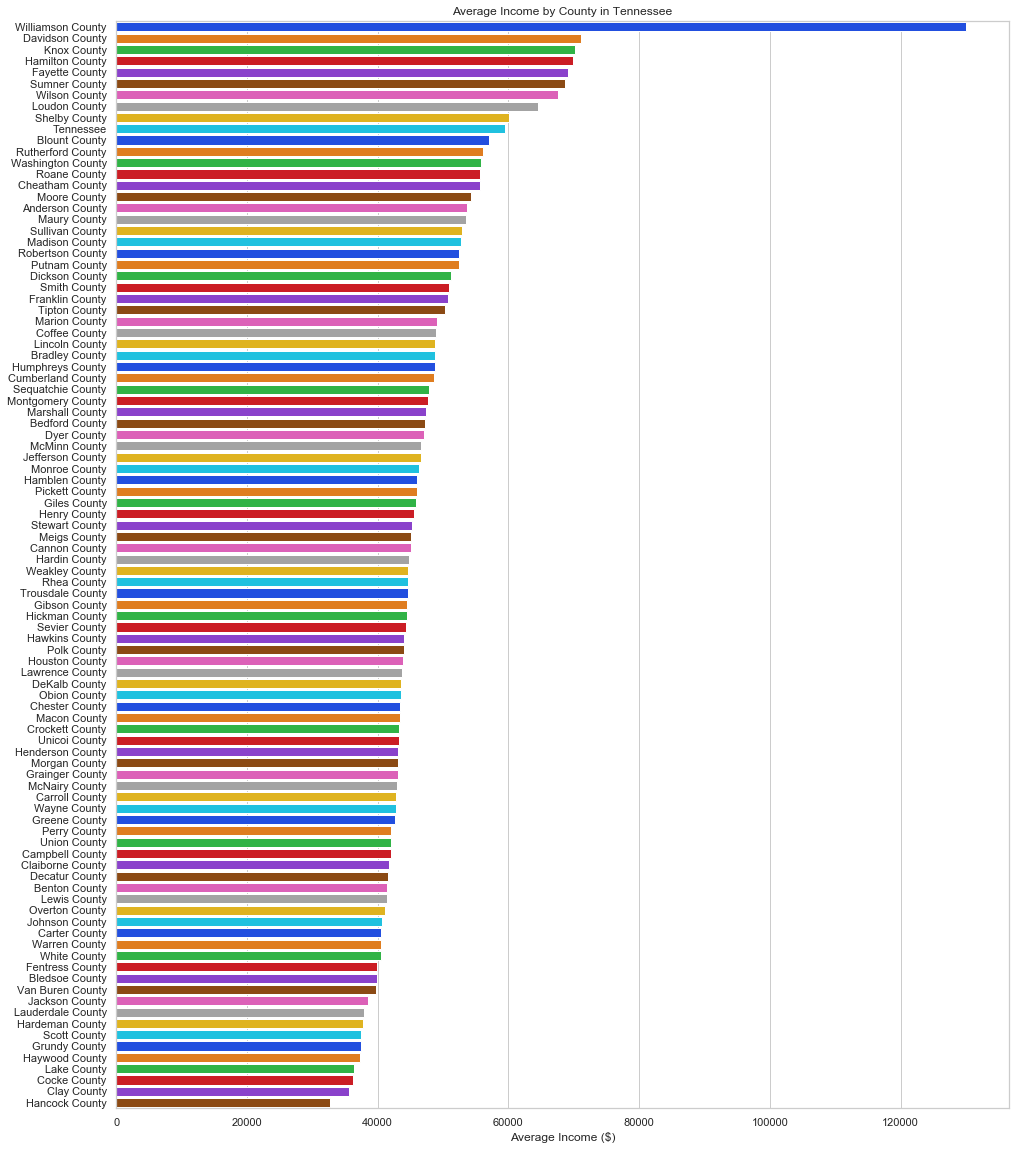

In [118]:
plt.figure(figsize = (16, 20))
sns.set(style="whitegrid")
sns.barplot('avg_income', 'county', data = income_county_agg, palette = 'bright')
plt.xlabel('Average Income ($)')
plt.ylabel('')
plt.title('Average Income by County in Tennessee');

### Create two more barplots: one to show the total cost of a heart attack by county and the other to show the total cost of cancer by county

In [119]:
tennessee.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661


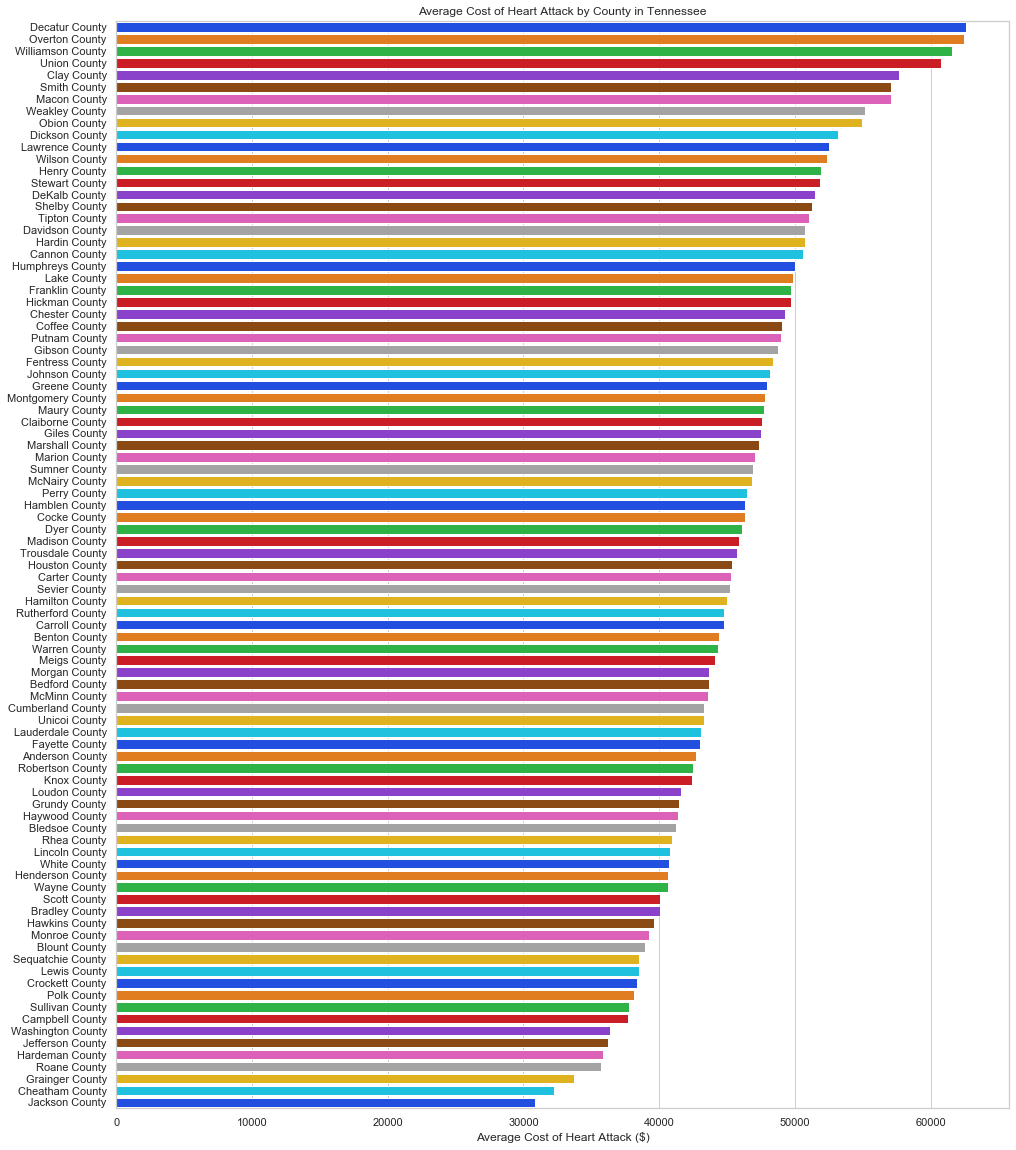

In [120]:
tennessee = tennessee.sort_values('analysis_value', ascending = False)

plt.figure(figsize = (16, 20))
sns.set(style="whitegrid")
sns.barplot('analysis_value', 'county', data = tennessee, palette = 'bright')
plt.xlabel('Average Cost of Heart Attack ($)')
plt.ylabel('')
plt.title('Average Cost of Heart Attack by County in Tennessee');

In [121]:
tenn_cancer.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2396,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,15454
2397,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,19219


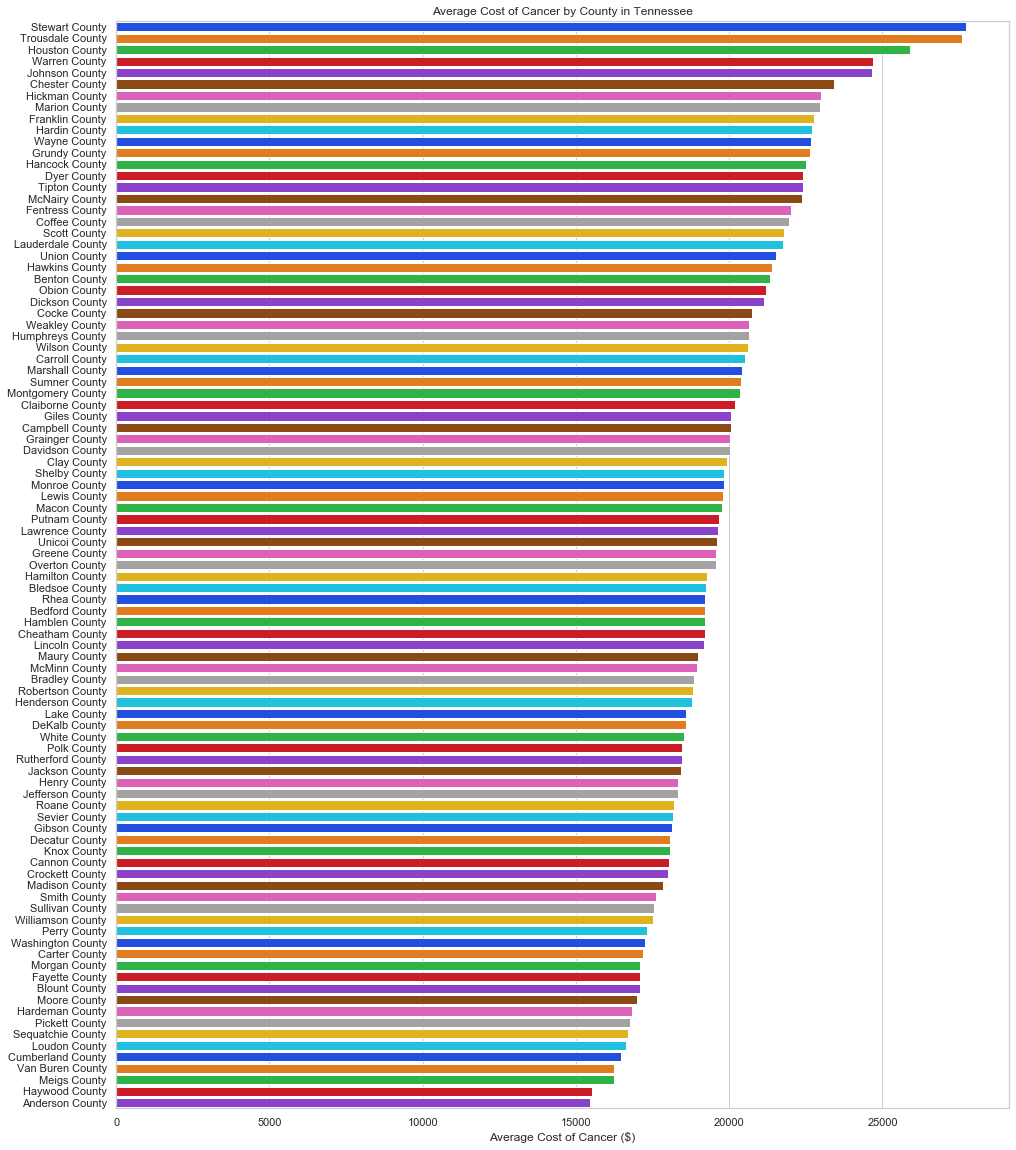

In [122]:
tenn_cancer = tenn_cancer.sort_values('analysis_value', ascending = False)

plt.figure(figsize = (16, 20))
sns.set(style="whitegrid")
sns.barplot('analysis_value', 'county', data = tenn_cancer, palette = 'bright')
plt.xlabel('Average Cost of Cancer ($)')
plt.ylabel('')
plt.title('Average Cost of Cancer by County in Tennessee');

### Create a second DataFrame for `tn_ha_costs` - you can name it `tn_ha_costs2` or something similar by merging `tn_ha_costs` with `income_county_agg` and keeping just these four columns:`county`, `urban`, `analysis_value`, `avg_income`. Create a `cost_income_ratio` column to compare the total cost (`analysis_value`) to the average annual income. Use the `describe()` function to see the statistical description of the ratio. Repeat this for the cancer dataset.

In [123]:
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income,avg_income2
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0,130072.0
18,Davidson County,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0,71028.0
46,Knox County,207730,97340,81770,24260,394450,119160,49830,14272173,206990,14528414,3410,11587,70189.0,70189.0
32,Hamilton County,164170,75180,61490,23840,312800,97450,40590,11249180,163590,11427589,3560,11502,69855.0,69855.0
23,Fayette County,19030,7510,7910,3190,37250,11450,5510,1289529,18970,1312112,420,1310,69168.0,69168.0


In [124]:
county_incomes = income_county_agg[['county', 'avg_income']]
county_incomes.head(2)

,county,avg_income
94,Williamson County,130072.0
18,Davidson County,71028.0


In [125]:
tennessee.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2049,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47039,Decatur County,TENNESSEE,Rural,All,undefined,62641
2094,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47133,Overton County,TENNESSEE,Rural,All,undefined,62486


In [126]:
county_tn_heart = tennessee[['county', 'urban', 'analysis_value']]
county_tn_heart.head(2)

,county,urban,analysis_value
2049,Decatur County,Rural,62641
2094,Overton County,Rural,62486


In [127]:
tn_ha_costs = pd.merge(left = county_tn_heart, right = county_incomes)
tn_ha_costs.head(2)

,county,urban,analysis_value,avg_income
0,Decatur County,Rural,62641,41512.0
1,Overton County,Rural,62486,41100.0


In [128]:
tn_ha_costs.tail(2)

,county,urban,analysis_value,avg_income
89,Cheatham County,Urban,32279,55583.0
90,Jackson County,Rural,30831,38458.0


In [129]:
tn_ha_costs['cost_income_ratio'] = tn_ha_costs.analysis_value / tn_ha_costs.avg_income
tn_ha_costs.describe()

,analysis_value,avg_income,cost_income_ratio
count,91.000000,91.000000,91.000000
mean,45762.989011,48059.109890,0.986273
std,6574.670462,11859.019531,0.214552
min,30831.000000,35658.000000,0.473130
25%,41105.500000,42358.500000,0.850326
50%,45384.000000,44666.000000,1.001318
75%,49698.500000,50494.500000,1.117770
max,62641.000000,130072.000000,1.618290


In [130]:
tenn_cancer.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2476,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47161,Stewart County,TENNESSEE,Urban,All,undefined,27740
2480,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47169,Trousdale County,TENNESSEE,Urban,All,undefined,27602


In [131]:
county_cancer = tenn_cancer[['county', 'urban', 'analysis_value']]
county_cancer.head(2)

,county,urban,analysis_value
2476,Stewart County,Urban,27740
2480,Trousdale County,Urban,27602


In [132]:
tn_cancer_costs = pd.merge(left = county_cancer, right = county_incomes)
tn_cancer_costs.head(2)

,county,urban,analysis_value,avg_income
0,Stewart County,Urban,27740,45266.0
1,Trousdale County,Urban,27602,44579.0


In [133]:
tn_cancer_costs['cost_income_ratio'] = tn_cancer_costs.analysis_value / tn_cancer_costs.avg_income
tn_cancer_costs.describe()

,analysis_value,avg_income,cost_income_ratio
count,95.000000,95.000000,95.000000
mean,19757.894737,47854.631579,0.430497
std,2436.304533,11760.400939,0.097032
min,15454.000000,32717.000000,0.134748
25%,18103.500000,42051.500000,0.362230
50%,19563.000000,44666.000000,0.428809
75%,21153.000000,50494.500000,0.480751
max,27740.000000,130072.000000,0.688174


### Next, create additional plots to investigate the data. 
will return to do this

Remove 'county' from 'county' column for heart attack df and cancer df

In [134]:
tn_ha_costs.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Decatur County,Rural,62641,41512.0,1.508985
1,Overton County,Rural,62486,41100.0,1.520341
2,Williamson County,Urban,61541,130072.0,0.473130
3,Union County,Urban,60785,42048.0,1.445610
4,Clay County,Rural,57705,35658.0,1.618290


In [135]:
tn_ha_costs.county = tn_ha_costs.county.str[0:-7]
tn_ha_costs.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Decatur,Rural,62641,41512.0,1.508985
1,Overton,Rural,62486,41100.0,1.520341
2,Williamson,Urban,61541,130072.0,0.473130
3,Union,Urban,60785,42048.0,1.445610
4,Clay,Rural,57705,35658.0,1.618290


In [136]:
tn_cancer_costs.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Stewart County,Urban,27740,45266.0,0.612822
1,Trousdale County,Urban,27602,44579.0,0.619170
2,Houston County,Rural,25909,43913.0,0.590008
3,Warren County,Rural,24699,40462.0,0.610425
4,Johnson County,Rural,24647,40696.0,0.605637


In [137]:
tn_cancer_costs.county = tn_cancer_costs.county.str[0:-7]
tn_cancer_costs.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Stewart,Urban,27740,45266.0,0.612822
1,Trousdale,Urban,27602,44579.0,0.619170
2,Houston,Rural,25909,43913.0,0.590008
3,Warren,Rural,24699,40462.0,0.610425
4,Johnson,Rural,24647,40696.0,0.605637


In [138]:
# create target variable
ha_cost_income_ratio_mean = tn_ha_costs.cost_income_ratio.mean()
tn_ha_costs['cost_ratio_above_mean'] = [1 if ratio > ha_cost_income_ratio_mean else 0 for ratio in tn_ha_costs.cost_income_ratio]

In [139]:
tn_ha_costs.cost_ratio_above_mean.value_counts(normalize = True)

1    0.527473
0    0.472527
Name: cost_ratio_above_mean, dtype: float64

In [140]:
tn_ha_costs.head(2)

,county,urban,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean
0,Decatur,Rural,62641,41512.0,1.508985,1
1,Overton,Rural,62486,41100.0,1.520341,1


In [141]:
tn_ha_costs.describe()

,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean
count,91.000000,91.000000,91.000000,91.000000
mean,45762.989011,48059.109890,0.986273,0.527473
std,6574.670462,11859.019531,0.214552,0.502011
min,30831.000000,35658.000000,0.473130,0.000000
25%,41105.500000,42358.500000,0.850326,0.000000
50%,45384.000000,44666.000000,1.001318,1.000000
75%,49698.500000,50494.500000,1.117770,1.000000
max,62641.000000,130072.000000,1.618290,1.000000


In [142]:
# encode urban/rural
tn_ha_costs = pd.get_dummies(tn_ha_costs, columns = ['urban'], drop_first = True)
tn_ha_costs.head(2)

,county,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean,urban_Urban
0,Decatur,62641,41512.0,1.508985,1,0
1,Overton,62486,41100.0,1.520341,1,0


In [143]:
X = tn_ha_costs[['urban_Urban']]
y = tn_ha_costs.cost_ratio_above_mean

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

In [145]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
y_pred = logistic_model.predict(X_test)

In [147]:
print(metrics.accuracy_score(y_test, y_pred))

0.8260869565217391


In [148]:
print('                 Pred Below Mean:  Pred Above Mean:')
print('    Actual Below Mean:    ', metrics.confusion_matrix(y_test, y_pred)[0])
print('    Actual Above Mean:   ', metrics.confusion_matrix(y_test, y_pred)[1])

                 Pred Below Mean:  Pred Above Mean:
    Actual Below Mean:     [9 4]
    Actual Above Mean:    [ 0 10]


In [149]:
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]
print('Area Under Curve:', metrics.roc_auc_score(y_test, y_pred_prob))

Area Under Curve: 0.8461538461538461


### Health food data for group project

In [629]:
food_access = pd.read_csv('/Users/nora/Desktop/git/vanderbilt-data-essentials-cohort-2/data/grocery_fastfood.csv')
food_access.head()

,State,County,GROCPTH14,FFRPTH14
0,AL,Autauga,0.072209,0.649878
1,AL,Baldwin,0.144920,0.659634
2,AL,Barbour,0.185963,0.818239
3,AL,Bibb,0.222163,0.222163
4,AL,Blount,0.103952,0.363832


In [630]:
tn_food_access = food_access.query('State == "TN"')
tn_food_access.head()

,State,County,GROCPTH14,FFRPTH14
2428,TN,Anderson,0.172122,0.847368
2429,TN,Bedford,0.128681,0.514723
2430,TN,Benton,0.247755,0.495509
2431,TN,Bledsoe,0.071782,0.000000
2432,TN,Blount,0.126643,0.506574


In [631]:
tn_food_access.columns = ['state', 'county', 'GROCPTH14', 'FFRPTH14']
tn_food_access.head()

,state,county,GROCPTH14,FFRPTH14
2428,TN,Anderson,0.172122,0.847368
2429,TN,Bedford,0.128681,0.514723
2430,TN,Benton,0.247755,0.495509
2431,TN,Bledsoe,0.071782,0.000000
2432,TN,Blount,0.126643,0.506574


In [632]:
tn_food_access = tn_food_access[['county', 'GROCPTH14', 'FFRPTH14']]
tn_food_access.head()

,county,GROCPTH14,FFRPTH14
2428,Anderson,0.172122,0.847368
2429,Bedford,0.128681,0.514723
2430,Benton,0.247755,0.495509
2431,Bledsoe,0.071782,0.000000
2432,Blount,0.126643,0.506574


In [633]:
tn_food_access['fast_grocery_ratio'] = tn_food_access.FFRPTH14 / tn_food_access.GROCPTH14
tn_food_access.head()

,county,GROCPTH14,FFRPTH14,fast_grocery_ratio
2428,Anderson,0.172122,0.847368,4.923077
2429,Bedford,0.128681,0.514723,4.000000
2430,Benton,0.247755,0.495509,2.000000
2431,Bledsoe,0.071782,0.000000,0.000000
2432,Blount,0.126643,0.506574,4.000000


In [634]:
tn_cancer_costs_factors = pd.merge(tn_cancer_costs, tn_food_access, on = 'county', how = 'left')
tn_cancer_costs_factors.head()

,county,urban,analysis_value,avg_income,cost_income_ratio,GROCPTH14,FFRPTH14,fast_grocery_ratio
0,Stewart,Urban,27740,45266.0,0.612822,0.150614,0.451841,3.000000
1,Trousdale,Urban,27602,44579.0,0.619170,0.374906,0.499875,1.333333
2,Houston,Rural,25909,43913.0,0.590008,0.241926,0.725777,3.000000
3,Warren,Rural,24699,40462.0,0.610425,0.150116,0.600465,4.000000
4,Johnson,Rural,24647,40696.0,0.605637,0.223977,0.335965,1.500000


In [635]:
tn_ha_costs_factors = pd.merge(tn_ha_costs, tn_food_access, on = 'county', how = 'left')
tn_ha_costs_factors.head()

,county,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean,urban_Urban,GROCPTH14,FFRPTH14,fast_grocery_ratio
0,Decatur,62641,41512.0,1.508985,1,0,0.342877,0.342877,1.000000
1,Overton,62486,41100.0,1.520341,1,0,0.272381,0.499364,1.833333
2,Williamson,61541,130072.0,0.473130,0,1,0.146180,0.779628,5.333333
3,Union,60785,42048.0,1.445610,1,1,0.052320,0.209282,4.000001
4,Clay,57705,35658.0,1.618290,1,0,0.386349,0.515132,1.333333


In [650]:
X = tn_ha_costs_factors[['urban_Urban','FFRPTH14']]
y = tn_ha_costs.cost_ratio_above_mean

In [651]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [652]:
y_pred = logistic_model.predict(X_test)

In [653]:
print(metrics.accuracy_score(y_test, y_pred))

0.6956521739130435


In [654]:
print('                 Pred Below Mean:  Pred Above Mean:')
print('    Actual Below Mean:    ', metrics.confusion_matrix(y_test, y_pred)[0])
print('    Actual Above Mean:   ', metrics.confusion_matrix(y_test, y_pred)[1])

                 Pred Below Mean:  Pred Above Mean:
    Actual Below Mean:     [6 7]
    Actual Above Mean:    [ 0 10]


In [655]:
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]
print('Area Under Curve:', metrics.roc_auc_score(y_test, y_pred_prob))

Area Under Curve: 0.8153846153846154


In [657]:
tn_ha_costs.describe()

,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean,urban_Urban
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45762.989011,48059.109890,0.986273,0.527473,0.417582
std,6574.670462,11859.019531,0.214552,0.502011,0.495893
min,30831.000000,35658.000000,0.473130,0.000000,0.000000
25%,41105.500000,42358.500000,0.850326,0.000000,0.000000
50%,45384.000000,44666.000000,1.001318,1.000000,0.000000
75%,49698.500000,50494.500000,1.117770,1.000000,1.000000
max,62641.000000,130072.000000,1.618290,1.000000,1.000000
